## ---->  Take four original photos. Do Image Segmentation based on
### a. Edge based
### b. Region Based

# Libraries


In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
%matplotlib inline
from skimage.feature import canny
from skimage.color import rgb2gray
from skimage.color import label2rgb

from scipy import ndimage
from skimage.filters import sobel

import skimage


# Dataset

The images selected are stored in the dataset folder

In [2]:
path ='./dataset/'

Reading the images we stored in the datasets folder

In [3]:
img1 = cv.imread(path+'img1.jpg')#imread is used to load an image file from a location
img2 = cv.imread(path+'img2.jpg')
img3 = cv.imread(path+'img3.jpg')
img4 = cv.imread(path+'img4.jpg')

In [4]:
# a function display images in a single figure
def display_images(figure_size,rows, cols, images_raw, titles, greyscale=True):
    images=[]
    if greyscale:
        images= images_raw
    else:
        for image in images_raw:
            images.append(cv.cvtColor(image, cv.COLOR_BGR2RGB))
        
    fig = plt.figure(figsize=figure_size) #creating a figure
  
    # add subplots inside the figure so that we can see preview all the images at once
    for i in range(0, len(images)):        
        fig.add_subplot(rows, cols, i+1)
        plt.imshow(images[i], cmap='gray')# Shows an image
        plt.title(titles[i])
        plt.axis('off')

In [5]:
images = [img1, img2, img3, img4]
titles = ['First Image','Second Image', 'Third Image', 'Fourth Image']

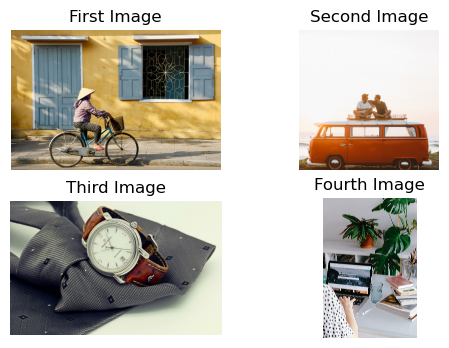

In [6]:
display_images((6,4), 2,2 ,images,titles,False)

Here are the four images we wish to do  feature extraction on

# a) Edge based Image Segmentation

In [7]:
def edge_based_image_segmentation(image):
    #convert the loaded image into greyscale
    grey_img = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    blur = cv.GaussianBlur(grey_img, (3,3), 0)
    edges = cv.Canny(blur, 100,200)
    #Fill the image for edge segmentation
    image_filled = ndimage.binary_fill_holes(edges)
    display_images((10, 8), 1, 3, [grey_img, edges, image_filled], ['Original Image','Canny Edges','Filled'])

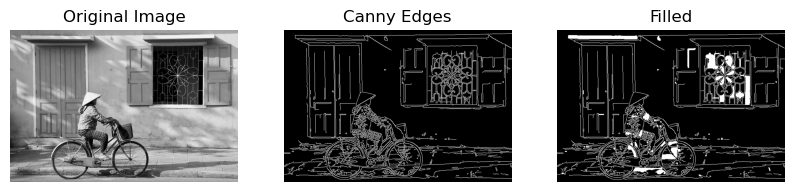

In [8]:
edge_based_image_segmentation(img1)

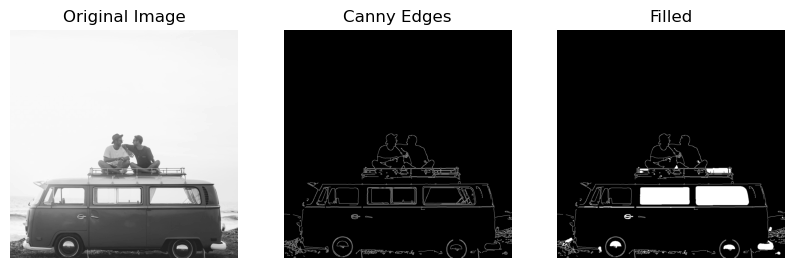

In [9]:
edge_based_image_segmentation(img2)

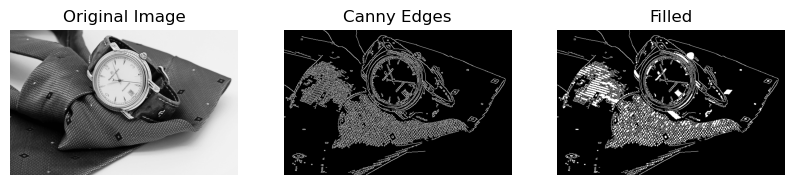

In [10]:
edge_based_image_segmentation(img3)

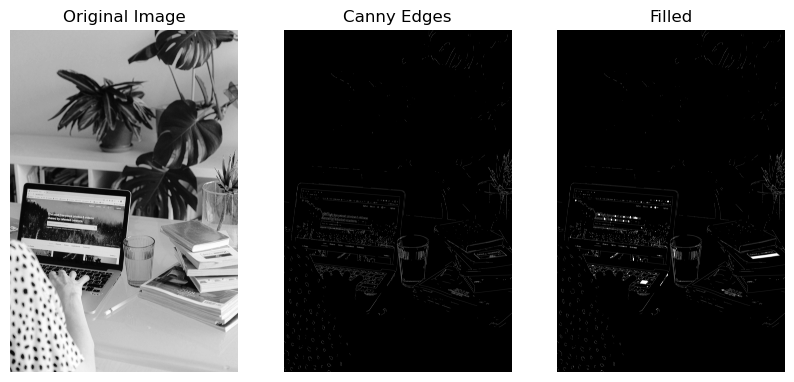

In [11]:
edge_based_image_segmentation(img4)

# b.) Region Based Image Segmentation

In [12]:
def region_based_segmentation(image):
    #converting image to greyscale
    im  = image[:,:, 0]

    #to extract the elevation map
    e_map = sobel(im)
    regions = np.zeros_like(im)
    #creating regions
    #The best values for treshold could be found out by plotting the histogram and getting extreme parts
    regions[im < 120] = 1
    regions[im > 230] = 2
    #doing watershed image transformation for segmentation
    segmentation = skimage.segmentation.watershed(e_map, regions)
    segmentation = ndimage.binary_fill_holes(segmentation-1)
    labeled, _  = ndimage.label(segmentation)
    image_label_overlay = label2rgb(labeled, im)
    display_images((10, 8), 1, 2, [im, image_label_overlay], ['Original', 'After Segmentation'])

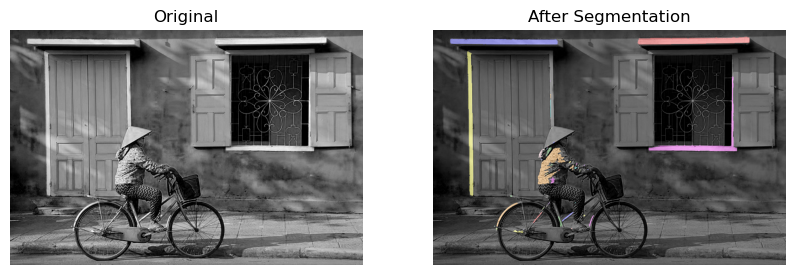

In [13]:
region_based_segmentation(img1)

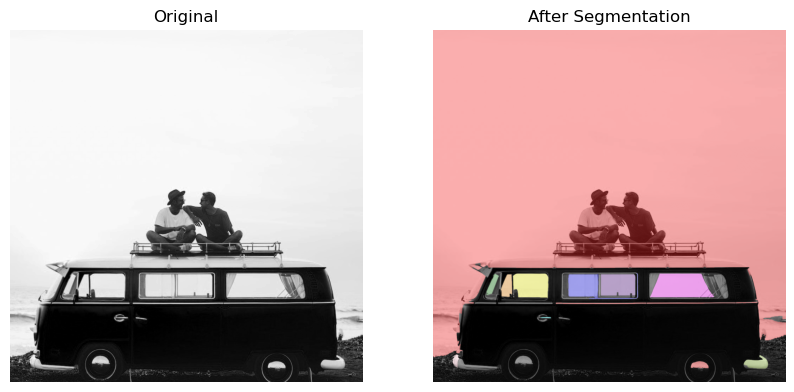

In [14]:
region_based_segmentation(img2)

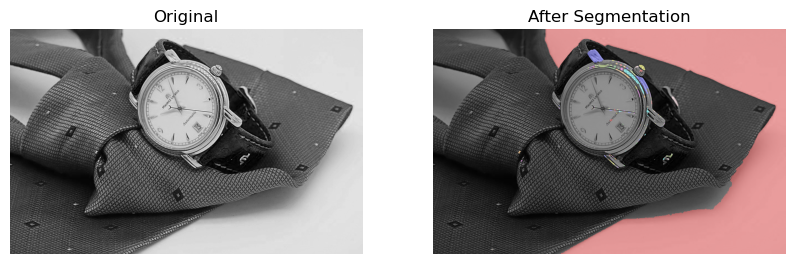

In [15]:
region_based_segmentation(img3)

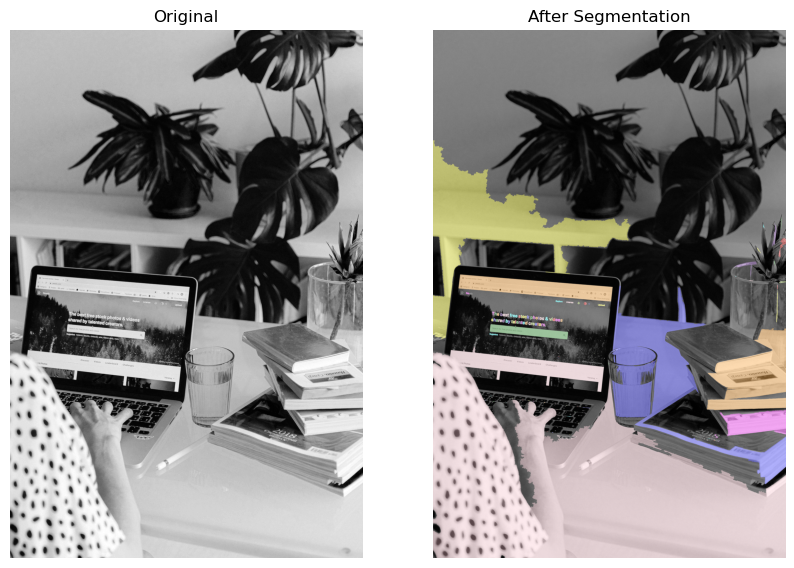

In [16]:
region_based_segmentation(img4)